<a href="https://colab.research.google.com/github/kemiant/Elements-of-Software-Design/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In this example we will consider quality of wine based on a variety of other factors.

In this notebook, we'll build a linear regression model to predict 'quality' using a variety of predictor variables.


## Understanding the Data

As with any data project, let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
import pandas as pd

In [ ]:
# import data set of red wines and set the 'color' column to be red
red = pd.read_csv('winequality-red.csv', sep = ";")
red['color'] = 'Red'

# import data set of white wines and set the 'color' column to be white
white = pd.read_csv('winequality-white.csv', sep = ";")
white['color'] = 'White'

# combine the dataframes and take a look
df = pd.concat([red, white])
df.iloc[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [ ]:
# let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# check the shape of the dataframe (rows, columns)
df.shape

(6497, 13)

In [ ]:
# let's look at some statistical information about the dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Visualising Data Using Plot

In [ ]:
#pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'alcohol'}, xlabel='quality'>

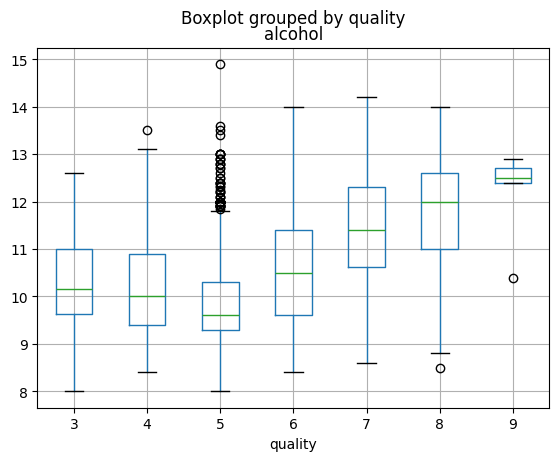

In [ ]:
# visualise the relationship between the features and the response using scatterplots

df.boxplot('alcohol', by = 'quality')

## Practice Problem

Create a new visualisation using one or more variables from this dataset, and write one takeaway you learned from your visualisation.

Use the python file from last week, online documentation, ChatGPT, or any other helpful resources!

In [ ]:
# Answer here:


# Performing Linear Regression

Equation of linear regression<br>
$y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $b$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

## Encoding Dummy Variables

Dummy variables are a way to convert categorical data into a numerical format, which is essential for many machine learning algorithms. These algorithms generally can’t handle categories like "red," "blue," or "green" directly, so dummy variables come to the rescue! They create binary columns (0s and 1s) for each category, making the data model-friendly.

Dummy variables are key because they allow categorical data to play nicely with algorithms that expect numbers (e.g., regression models). Without them, we’d be leaving a lot of useful data behind!

In Python, you can easily generate dummy variables using `pandas`. In this particular case, we only have one categorical variable (color) and it's binary (red or white). For binary variables, we can simply change the categories within the column to 1 and 0 or True and False. But for the sake of showing the process when there are categorical variables with 3+ categories, we'll encode color as a dummy variable.

Here's how:

In [ ]:
df = pd.get_dummies(df, columns=['color'])
df.iloc[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_Red,color_White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


Because color is only a binary category, the second column is redundant. So let's drop it to create our final dataframe.

In [ ]:
df.drop(columns = ['color_White'], inplace = True)
df.iloc[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_Red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True


## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [ ]:
# putting feature variables to X
X = df.drop(columns = ['quality'])

# print the first 5 rows
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_Red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True


In [ ]:
# putting response variable to y
y = df['quality']

# print the first 5 rows
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Splitting Data into Training and Testing Sets

In order to do this, we need to use the `scikit-learn` package, also called the `sklearn` package. This is the premier package for Machine Learning in Python. We will explore this package much deeper over the next few weeks and in the spring. If necessary, you can uncomment the following line of code in order to pip install this package.

In [ ]:
#pip install scikit-learn

In this case, instead of importing the entire `scikit-learn` package, we can import just the function(s) we intend to use. We're going to use the `train_test_split` function from the `model_selection` subpackage, which is basically another package nested within scikit-learn.

This way, whenever we want to call this function, we don't have to refer to the package it comes from.

In [ ]:
# random_state is the seed used by the random number generator, it can be any integer

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4547, 12)
(4547,)
(1950, 12)
(1950,)


In [ ]:
# this step is needed only when you are using a single feature
# simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,

import numpy as np
#X_train = X_train[:, np.newaxis]
#X_test = X_test[:, np.newaxis]

## Performing Linear Regression

In [ ]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})

103.20382309165552


,Feature,Coefficient
0,fixed acidity,0.092827
1,volatile acidity,-1.538709
2,citric acid,-0.105558
3,residual sugar,0.065250
4,chlorides,-0.315953
5,free sulfur dioxide,0.005933
6,total sulfur dioxide,-0.001659
7,density,-102.959218
8,pH,0.506488
9,sulphates,0.757937


$\hat{y} = 103.2 + 0.09 \times fixed acidity + ... + 0.32 \times \textit{color\_Red}$<br>

Now, let's use this equation to predict quality.

## Predictions

In [ ]:
# making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([6.72402631, 5.15181414, 6.30808037, ..., 6.45810828, 6.45608146,
       5.59400472])

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


Text(0.5, 1.0, 'Actual vs Predicted Values')

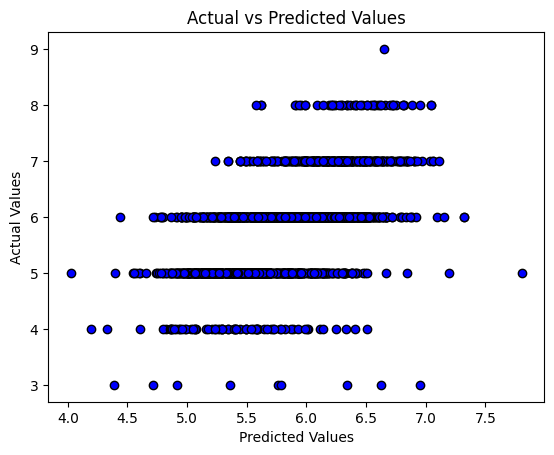

In [ ]:
# plotting actual vs predicted
plt.scatter(y_pred, y_test, color='blue', edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values')

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Root Mean Squared Error :' , round(rmse, 2))
print('R Squared :', round(r_squared, 3))

Root Mean Squared Error : 0.73
R Squared : 0.277


This MSE means that this model is typically wrong by a quality score of 0.73.</br>
This  R squared means that the variables in this model account for 27.7% of the variability in quality score.

## Practice Problem

#### Try creating a simple linear regression model with only one predictor. How does it perform out of sample?

In [ ]:
# Answer here:


### Let's see if we can improve this!

A good place to start is to look at which variables are statistically significant, so we know which variables are the most predictive, and therefore which to keep in our model. `Scikit-learn` unfortunately doesn't allow us to do this, so we'll use the `statsmodels` package instead. Uncomment the following line of code if you need to pip install `statsmodels`.

In [ ]:
# pip install statsmodels

In [ ]:
import statsmodels.api as sm
import pandas as pd

# change the True/False in the color column to a 1/0 for statsmodels (it can't handle boolean values)
X_train['color_Red'] = X_train['color_Red'].apply(lambda x: 1 if x == True else 0)

# add a constant to the model (for the intercept)
X_train = sm.add_constant(X_train)

# fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train)
results = model.fit()

# view the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     164.5
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:09:16   Log-Likelihood:                -5055.3
No. Observations:                4547   AIC:                         1.014e+04
Df Residuals:                    4534   BIC:                         1.022e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  103.2038     16.572      6.228      0.000      70.714     135.693
fixed acidity            0.0928      0.019      4.973      0.000       0.056       0.129
volatile acidity        -1.5387      0.099    -15.475      0.000      -1.734      -1.344
citric acid             -0.1056      0.096     -1.096      0.273      -0.294       0.083
residual sugar           0.0653      0.007      9.231      0.000       0.051       0.079
chlorides               -0.3160      0.420     -0.752      0.452      -1.140       0.508
free sulfur dioxide      0.0059      0.001      6.250      0.000       0.004       0.008
total sulfur dioxide    -0.0017      0.000     -4.167      0.000      -0.002      -0.001
density               -102.9592     16.848     -6.111      0.000    -135.990     -69.928
pH                       0.5065      0.108      4.679      0.000       0.294       0.719
sulphates                0.7579      0.092      8.201      0.000       0.577       0.939
alcohol                  0.2360      0.021     11.178      0.000       0.195       0.277
color_Red                0.3247      0.069      4.698      0.000       0.189       0.460
==============================================================================
Omnibus:                       98.096   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.220
Skew:                           0.100   Prob(JB):                     3.33e-44
Kurtosis:                       4.008   Cond. No.                     2.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Most of these variables appear to be statistically significant. However, citric acid and chlorides are not, so it is safe to exclude them from an improved model.

Let's also take a look at practical significance... which variables are statistically significant, but may not actually have that much of an impact on predictions of the quality score?

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


With our new set of features, let's repeat the entire process from above and see how it performs **out of sample**:

In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

lr_small = LinearRegression().fit(X_train, y_train)

y_pred = lr_small.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Root Mean Squared Error :', round(rmse, 2))
print('R Squared :', round(r_squared, 3))

Root Mean Squared Error : 0.74
R Squared : 0.257


With this model, we got a slightly worse RMSE (0.74 vs 0.73) and a slightly lower R Squared value (0.257 vs 0.277).

In my opinion, we should consider this a success. Even though we weren't able to improve the performance, we were able to create a model with essentially the same performance by using fewer features. Why is this important?

**Simpler models are often preferred in machine learning and statistical modeling for several reasons:**

Interpretability:
- Easier to Understand: Simple models are generally easier to interpret. For instance, a linear regression model provides clear insights into how each feature influences the outcome, allowing stakeholders to understand the relationships more readily.

Reduced Risk of Overfitting:
- Generalization: Simpler models are less likely to capture noise in the training data. Overfitting occurs when a model learns the training data too well, including its noise, which can lead to poor performance on unseen data. Simpler models tend to generalize better.

Faster Training and Prediction:
- Efficiency: Simpler models typically require less computational power and time to train, making them more suitable for large datasets or when quick predictions are necessary.

Robustness:
- Less Sensitive to Outliers: Simpler models can be more robust to outliers and noise in the data. Complex models might fit to outliers too closely, skewing the results.

Future Data:
- In the future, we may acquire new data, and some of that data may have missing values. Between two models with the same predictive performance, a model that uses more features is more likely to need those missing values when making predictions.

## Extra Practice Problems!

#### Try creating every possible simple linear regression model with only one predictor. Which one performs best?

In [ ]:
# Answer here:


#### Can you create a model which performs better out of sample than the regression model with all predictors?

In [ ]:
# Answer here:
